In [29]:
import numpy as np
import intvalpy as ip
        
ip.precision.increasedPrecisionQ = False
        
model = lambda a, x: (a + x[0] + x[1]) / (a + x[1] + x[2])

dx1 = lambda a, x: 1 / (a + x[1] + x[2])
dx2 = lambda a, x: -(a + x[0] + x[1]) / (a + x[1] + x[2])**2 + 1 / (a + x[1] + x[2])
dx3 = lambda a, x: -(a + x[0] + x[1]) / (a + x[1] + x[2])**2
grad = np.array([dx1, dx2, dx3])


x = np.array([170, 223, 253])

# входные параметры функции возьмём, как точные значения
length = 20
a = np.sort(np.random.randint(1, 2400, length).astype('float64'))

# выходные значения с зашумлением
error = np.random.normal(0, 0.001, length)
b = model(a, x) + error
# b[14] = 304992
# b[15] = 304992

# полагаем, что наибольшая ошибка нам известна
# и конструируем интервальный вектор выходных данных
epsilon = np.max(abs(error))
b = b + ip.Interval(-epsilon, epsilon)
a = ip.asinterval(a)

# weight = np.ones(len(b))
# weight[14] = 0.00000001
ip.nonlinear.Tol(model, a, b, maxQ=True, grad=grad, x0=x)

((True,
  array([169.02827679, 221.7018396 , 252.67357729]),
  0.0003784016511521049),
 (True,
  array([169.56172345, 221.16839294, 253.20702395]),
  0.0003784016511517718))

In [4]:
import intvalpy as ip
import numpy as np
from mpmath import *
from time import perf_counter as pc

ip.precision.increasedPrecisionQ = True
ip.precision.dps(50)

A = ip.zeros((8, 4))
A[0:, :] = np.array([-400440, 801193, -91906, -794234])
A[1:, :] = np.array([-801193, -400440, 794234, -91906])
A[2:, :] = np.array([-455275, -821605, 629764, 478962])
A[3:, :] = np.array([821605, -455275, -478962, 629764])
A[4:, :] = np.array([906754, 211561, -719976, 233679])
A[5:, :] = np.array([-211561, 906754, -233679, -719976])
A[6:, :] = np.array([-701307, 597374, 276388, -727253])
A[7:, :] = np.array([-597374, -701307, 727253, 276388])
A = A + ip.Interval(-200, 200)
b = np.array([-1623, -38942, -32327, 19414, 39459, 10602, -14473, -36124])
b = b + ip.Interval(-100, 100)

Rohn = ip.linear.Rohn(A, b)
pss = ip.linear.PSS(A, b, maxiter=4000)
print(((pss.a >= Rohn.a) & (pss.b <= Rohn.b)).all())
print(pss)

True
Interval(['[0.0380156, 0.0420132]', '[0.048014, 0.0520115]', '[0.01756, 0.0224754]', '[0.0275581, 0.0324735]'])


In [51]:
# ip.precision.increasedPrecisionQ = False
# ip.precision.dps(50)

import intvalpy as ip
import numpy as np
import matplotlib.pyplot as plt

from mpmath import *


from time import perf_counter as pc


model = lambda a, x: (a + x[0]) / (a + x[1])

dx1 = lambda a, x: 1 / (a + x[1])
dx2 = lambda a, x: -(a + x[0]) / (a + x[1])**2
grad = np.array([dx1, dx2])

t = np.array([31, 69, 144, 198, 359, 446, 536, 626, 716, 809, 903, 1039, 1161, \
              1316, 1536, 2029, 2400, 29, 64, 135, 189, 261, 342, 432, 517, 613, \
              699, 792, 888, 1020, 1142, 1301, 1511, 2017, 2400, 65, 96, 521, 617, \
              705, 794, 892, 1024, 1148, 1309, 1520, 2003, 2400, 27, 83, 121, 173, \
              234, 307, 394, 467, 553, 636, 715, 806, 915, 1026, 1170, 1364, 1500, \
              2400, 77, 112, 155, 216, 367, 458, 541, 639, 741, 825, 936, 1061, \
              1189, 1200, 1426, 1902, 2400, 67, 102, 145, 206, 357, 448, 531, 629, \
              731, 815, 900, 1030, 1115, 1326, 1554, 2015, 2400]);
data = np.array([0.8, 0.84, 0.85, 0.89, 0.93, 0.93, 0.93, 0.93, 0.93, 0.93, 0.93, \
                 0.95, 0.95, 0.96, 0.97, 0.99, 1, 0.79, 0.82, 0.85, 0.89, 0.91, 0.92, \
                 0.93, 0.93, 0.94, 0.93, 0.93, 0.94, 0.95, 0.95, 0.96, 0.97, 0.99, 1, \
                 0.84, 0.84, 0.94, 0.94, 0.94, 0.95, 0.95, 0.96, 0.96, 0.97, 0.96, \
                 0.97, 1, 0.78, 0.81, 0.84, 0.89, 0.9, 0.92, 0.93, 0.92, 0.93, 0.93, \
                 0.92, 0.93, 0.95, 0.95, 0.96, 0.97, 0.98, 1, 0.8, 0.82, 0.86, 0.9, \
                 0.91, 0.93, 0.93, 0.94, 0.94, 0.93, 0.94, 0.95, 0.95, 0.96, 0.96, \
                 0.98, 1, 0.81, 0.83, 0.86, 0.9, 0.91, 0.93, 0.93, 0.94, 0.94, 0.93, \
                 0.93, 0.94, 0.94, 0.97, 0.96, 0.98, 1])

t = t + ip.Interval(0, 0)
data = data + ip.Interval(-0.0255, 0.0255)

A = ip.zeros((100, 2))
A[:, 0] += ip.Interval(1, 1)
A[:, 1] -= data
b = t * (data - 1)

# A, b = ip.Neumeier(50, 3.5)

# print(ip.linear.Uni(A, b, maxQ=True))
# x0 = np.array([171.673, 224.912])
# print(ip.linear.Tol(A, b, x0=x0, maxQ=True), ip.linear.Tol(A, b, maxQ=True))
uni = ip.nonlinear.Uni(model, t, data, maxQ=True, grad=grad)
vertices = ip.IntLinIncR2(A, b, show = False)

c:\users\artem\appdata\local\programs\python\python37\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


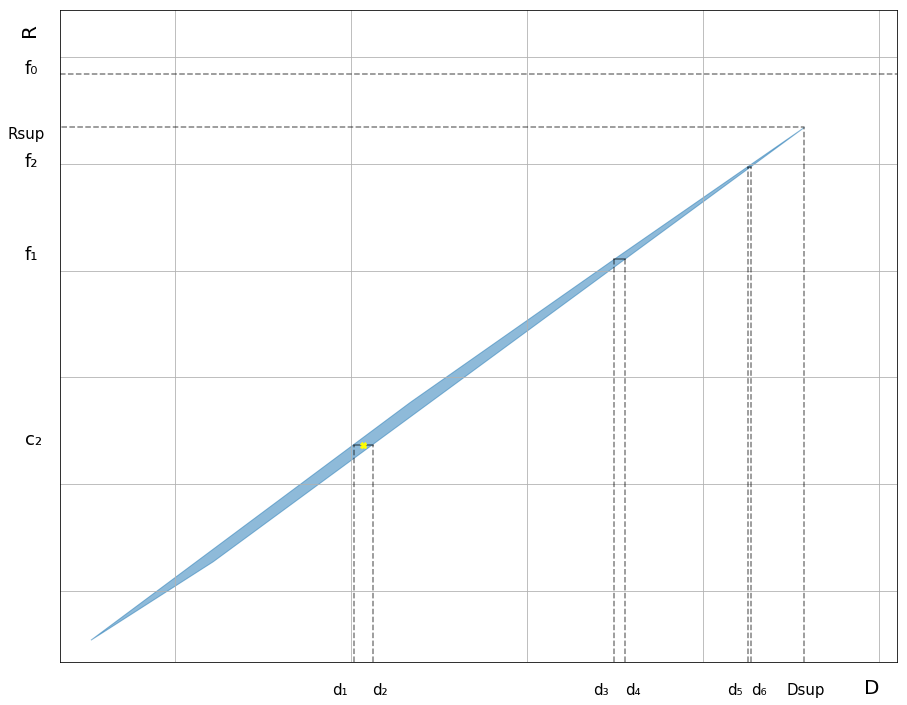

In [110]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(15, 12))
# fig.subplots_adjust(left=0, right=1, bottom=0, top=0.5)

ax = fig.add_subplot(111)

SUB = str.maketrans("0123456789", "₀₁₂₃₄₅₆₇₈₉")
infx, supx = 153.5049999999998, 201
infy, supy = 203.3349999999998,264.36499999999685

ax.grid(True)
# отключаем тики на оси и задаем границы рисунку
ax.tick_params(axis='x', labeltop='off', labelbottom='off', bottom=False, top=False)
ax.tick_params(axis='y', labelleft='off', labelright='off', left=False, right=False)
ax.set_xlim((infx, supx))
ax.set_ylim((infy, supy))

# подписываем оси
ax.set_xlabel('D', fontsize = 20)
ax.set_ylabel('R', fontsize = 20)
ax.yaxis.set_label_coords(-0.025, 0.97)
ax.xaxis.set_label_coords(0.97, -0.025)

ax.plot([170.15871946802977, 171.2405892214347],[uni[1][1], uni[1][1]], 
        linestyle = '-', color='black', alpha=0.5)

ax.plot([infx, supx],[max(vertices[0][:, 1])+5,  max(vertices[0][:, 1])+5], 
        linestyle = '--', color='black', alpha=0.5)

# пишем текст
ax.text(infx-2, uni[1][1], 'c2'.translate(SUB), fontsize = 18)
ax.text(infx-2, max(vertices[0][:, 1])+5, 'f0'.translate(SUB), fontsize = 18)

# строим прямые и подписи к ним
l = (max(vertices[0][:, 1]) + 5 + uni[1][1]) / 2
ax.plot([184.95201339435062, 185.5558022637784],[l, l], 
        linestyle = '-', color='black', alpha=0.5)
ax.text(infx-2, l, 'f1'.translate(SUB), fontsize = 18)
# ax.plot([infx, 184.95201339435062], [l, l], linestyle = '--', color='black', alpha=0.5)


ax.plot([184.95201339435062, 184.95201339435062],[infy, l], 
        linestyle = '--', color='black', alpha=0.5)
ax.plot([185.5558022637784, 185.5558022637784],[infy, l], 
        linestyle = '--', color='black', alpha=0.5)

ax.text(184.95201339435062 - 1.2, infy-3, 'd3'.translate(SUB), fontsize = 15)
ax.text(185.5558022637784, infy-3, 'd4'.translate(SUB), fontsize = 15)

# +-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+

l = (max(vertices[0][:, 1]) + 5 + l) / 2
ax.plot([192.53354782851488, 192.71340878495027],[l, l], 
        linestyle = '-', color='black', alpha=0.5)
ax.text(infx-2, l, 'f2'.translate(SUB), fontsize = 18)
# ax.plot([infx, 192.53354782851488], [l, l], linestyle = '--', color='black', alpha=0.5)


ax.plot([192.53354782851488, 192.53354782851488],[infy, l], 
        linestyle = '--', color='black', alpha=0.5)
ax.plot([192.71340878495027, 192.71340878495027],[infy, l], 
        linestyle = '--', color='black', alpha=0.5)

ax.text(192.53354782851488 - 1.2, infy-3, 'd5'.translate(SUB), fontsize = 15)
ax.text(192.71340878495027, infy-3, 'd6'.translate(SUB), fontsize = 15)


# +-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+

ax.plot([max(vertices[0][:, 0]), max(vertices[0][:, 0]), 153.5049999999998],[203.3349999999998, max(vertices[0][:, 1]), max(vertices[0][:, 1])], 
        linestyle = '--', color='black', alpha=0.5)
ax.text(max(vertices[0][:, 0]) - 1, infy-3, 'Dsup', fontsize = 15)
ax.text(infx-3, max(vertices[0][:, 1])-1, 'Rsup', fontsize = 15)


ax.plot([170.15871946802977, 170.15871946802977],[infy, uni[1][1]], 
        linestyle = '--', color='black', alpha=0.5)
ax.plot([171.241, 171.241],[infy, uni[1][1]], 
        linestyle = '--', color='black', alpha=0.5)

ax.text(170.15871946802977 - 1.2, infy-3, 'd1'.translate(SUB), fontsize = 15)
ax.text(171.2405892214347, infy-3, 'd2'.translate(SUB), fontsize = 15)

# ax.plot([infx, 170.15871946802977], [uni[1][1], uni[1][1]], linestyle = '--', color='black', alpha=0.5)




ax.plot([uni[1][0]],[uni[1][1]], marker='X', color='yellow')

for k in range(4):
    if len(vertices[k]) > 0:
        x, y = vertices[k][:, 0], vertices[k][:, 1]
        ax.fill(x, y, linestyle='-', linewidth=1, color='C0', alpha=0.5)
#         ax.scatter(x, y, s=s, color='black', alpha=1)

fig.savefig("outerEvaluation.png", bbox_inches='tight', pad_inches=0)

In [6]:
import intvalpy as ip
import numpy as np
from mpmath import *
from time import perf_counter as pc

model = lambda a, x: (a + x[0]) / (a + x[1])

dx1 = lambda a, x: 1 / (a + x[1])
dx2 = lambda a, x: -(a + x[0]) / (a + x[1])**2
grad = np.array([dx1, dx2])

t = np.array([31, 69, 144, 198, 359, 446, 536, 626, 716, 809, 903, 1039, 1161, \
              1316, 1536, 2029, 2400, 29, 64, 135, 189, 261, 342, 432, 517, 613, \
              699, 792, 888, 1020, 1142, 1301, 1511, 2017, 2400, 65, 96, 521, 617, \
              705, 794, 892, 1024, 1148, 1309, 1520, 2003, 2400, 27, 83, 121, 173, \
              234, 307, 394, 467, 553, 636, 715, 806, 915, 1026, 1170, 1364, 1500, \
              2400, 77, 112, 155, 216, 367, 458, 541, 639, 741, 825, 936, 1061, \
              1189, 1200, 1426, 1902, 2400, 67, 102, 145, 206, 357, 448, 531, 629, \
              731, 815, 900, 1030, 1115, 1326, 1554, 2015, 2400]);
data = np.array([0.8, 0.84, 0.85, 0.89, 0.93, 0.93, 0.93, 0.93, 0.93, 0.93, 0.93, \
                 0.95, 0.95, 0.96, 0.97, 0.99, 1, 0.79, 0.82, 0.85, 0.89, 0.91, 0.92, \
                 0.93, 0.93, 0.94, 0.93, 0.93, 0.94, 0.95, 0.95, 0.96, 0.97, 0.99, 1, \
                 0.84, 0.84, 0.94, 0.94, 0.94, 0.95, 0.95, 0.96, 0.96, 0.97, 0.96, \
                 0.97, 1, 0.78, 0.81, 0.84, 0.89, 0.9, 0.92, 0.93, 0.92, 0.93, 0.93, \
                 0.92, 0.93, 0.95, 0.95, 0.96, 0.97, 0.98, 1, 0.8, 0.82, 0.86, 0.9, \
                 0.91, 0.93, 0.93, 0.94, 0.94, 0.93, 0.94, 0.95, 0.95, 0.96, 0.96, \
                 0.98, 1, 0.81, 0.83, 0.86, 0.9, 0.91, 0.93, 0.93, 0.94, 0.94, 0.93, \
                 0.93, 0.94, 0.94, 0.97, 0.96, 0.98, 1])

t = t + ip.Interval(0, 0)
data = data + ip.Interval(-0.0255, 0.0255)
# data = data + ip.Interval(-0.0, 0.0)

print(ip.nonlinear.Tol(model, t, data, maxQ=True, grad=grad))
x0 = np.array([173.9506, 227.68  ])
ip.nonlinear.Uni(model, t, data, x0=x0, maxQ=True, grad=grad)


(True, array([170.68864166, 223.71543213]), 0.0018354480890163671)


(True, array([170.68864166, 223.71543213]), 0.0018354480890163671)

In [4]:
import intvalpy as ip
import numpy as np
from mpmath import *
from time import perf_counter as pc

ip.precision.increasedPrecisionQ = True
ip.precision.dps(36)

def f(a, b):
    return 333.75*b**6 + a**2*(11*a**2*b**2 - b**6 - 121*b**4 - 2) + 5.5*b**8 + a/(2*b)

a = ip.Interval(77617, 77617)
b = ip.Interval(33096, 33096)

# t0 = pc()
# # for _ in range(100):
# #     f(a, b)
# print(f(a, b), pc()-t0)

f(a, b)

Interval(['[-0.827396, -0.827396]'])

In [37]:
import intvalpy as ip
import numpy as np
from mpmath import *
from time import perf_counter as pc

ip.precision.increasedPrecisionQ = False

model = lambda a, x: (a + x[0]) / (a + x[1])

dx1 = lambda a, x: 1 / (a + x[1])
dx2 = lambda a, x: -(a + x[0]) / (a + x[1])**2
grad = np.array([dx1, dx2])

t = np.array([31, 69, 144, 198, 359, 446, 536, 626, 716, 809, 903, 1039, 1161, \
              1316, 1536, 2029, 2400, 29, 64, 135, 189, 261, 342, 432, 517, 613, \
              699, 792, 888, 1020, 1142, 1301, 1511, 2017, 2400, 65, 96, 521, 617, \
              705, 794, 892, 1024, 1148, 1309, 1520, 2003, 2400, 27, 83, 121, 173, \
              234, 307, 394, 467, 553, 636, 715, 806, 915, 1026, 1170, 1364, 1500, \
              2400, 77, 112, 155, 216, 367, 458, 541, 639, 741, 825, 936, 1061, \
              1189, 1200, 1426, 1902, 2400, 67, 102, 145, 206, 357, 448, 531, 629, \
              731, 815, 900, 1030, 1115, 1326, 1554, 2015, 2400]);
data = np.array([0.8, 0.84, 0.85, 0.89, 0.93, 0.93, 0.93, 0.93, 0.93, 0.93, 0.93, \
                 0.95, 0.95, 0.96, 0.97, 0.99, 1, 0.79, 0.82, 0.85, 0.89, 0.91, 0.92, \
                 0.93, 0.93, 0.94, 0.93, 0.93, 0.94, 0.95, 0.95, 0.96, 0.97, 0.99, 1, \
                 0.84, 0.84, 0.94, 0.94, 0.94, 0.95, 0.95, 0.96, 0.96, 0.97, 0.96, \
                 0.97, 1, 0.78, 0.81, 0.84, 0.89, 0.9, 0.92, 0.93, 0.92, 0.93, 0.93, \
                 0.92, 0.93, 0.95, 0.95, 0.96, 0.97, 0.98, 1, 0.8, 0.82, 0.86, 0.9, \
                 0.91, 0.93, 0.93, 0.94, 0.94, 0.93, 0.94, 0.95, 0.95, 0.96, 0.96, \
                 0.98, 1, 0.81, 0.83, 0.86, 0.9, 0.91, 0.93, 0.93, 0.94, 0.94, 0.93, \
                 0.93, 0.94, 0.94, 0.97, 0.96, 0.98, 1])

t = t + ip.Interval(-0.1, 0.1)
# t = t + ip.Interval(0, 0)
data = data + ip.Interval(-0.0255, 0.0255)
# data = data + ip.Interval(-0.0255, 0.0255)

# print(ip.nonlinear.Tol(model, t, data, maxQ=True, grad=grad))
x0 = np.array([173.9506, 227.68  ])
uni = ip.nonlinear.Uni(model, t, data, x0=x0, maxQ=True, grad=grad)
tol = ip.nonlinear.Tol(model, t, data, maxQ=True, grad=grad)
print(uni)
print(tol)

(True, array([171.66892144, 224.85208638]), 0.002293495870997586)
(True, array([171.67294486, 224.91193005]), 0.0012352175703260748)


In [52]:
model = lambda a, x: a * x

dx1 = lambda a, x: a
grad = np.array([dx1])


A = ip.zeros((100, 2))
A[:, 0] = 1
a = A[:, 0]
# a = data

x = ip.Interval(-4*uni[1][1] + uni[1][1], uni[1][1])
# x = ip.Interval(uni[1][0], 4*uni[1][0])
# x = ip.Interval(0, 10000)
x0 = x.a

R = x.mid
# b = data*(R+t) - t
# b = R + t - t*data
b = (data-1) * 1/(R + t).inv + R

nit = 0
while x.wid > 1e-10 and nit <= 200:
#     uni2 = ip.linear.Uni(A, b, maxQ=True)
    uni2 = ip.nonlinear.Uni(model, a, b, x0=uni[1][0], maxQ=True, grad=grad)
#     print(uni2)
#     print('tol: ', ip.linear.Tol(A, b, maxQ=True))
#     print('uni: ', ip.linear.Uni(A, b, maxQ=True))
#     print('+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+\n\n')
    if uni2[2] > 0:
        x = ip.Interval(x.a, x.mid)
    else:
        x = ip.Interval(x.mid, x.b)

#     if uni2[2] > 0:
#         x = ip.Interval(x.mid, x.b)
#     else:
#         x = ip.Interval(x.a, x.mid)
        
    R = x.mid
#     b = data*(R+t) - t
    b = (data-1) * 1/(R + t).inv + R
    
    nit += 1
print(x.b, uni2)

205.60305343512985 (True, array([155.42473702]), 7.887024366937112e-13)


In [31]:
from scipy.optimize import minimize

def f(R):
    return (R + (data - 1) * 1/(R + t).inv).a

cons = ({'type': 'ineq', 'fun': lambda R:  uni2[1][0] - f(R)})

x0 = -tol[1][0]
maximize = minimize(f, x0, constraints=cons, method='COBYLA', tol=1e-12, options={'maxiter': 2000})
maximize

     fun: -1796.457065978441
   maxcv: 0.0
 message: 'Maximum number of function evaluations has been exceeded.'
    nfev: 2000
  status: 2
 success: False
       x: array(-2169.67294486)

In [3]:
import intvalpy as ip
import numpy as np

from time import perf_counter as pc

ip.precision.increasedPrecisionQ = False

A = ip.Interval([[2, -2],[-1, 2]], [[4, 1],[2, 4]])
b = ip.Interval([-2, -2], [2, 2])
A = A - 5
b = b-5

# A, b = ip.Neumeier(4, 3.5)
def ASh(A, b):
    
    def StartBar(tol_Ab, supQ):
        if supQ:
            return tol_Ab[1] + ip.Interval(0*tol_Ab[1], 6*(tol_Ab[1]+1))
        else:
            return tol_Ab[1] + ip.Interval(-6*(tol_Ab[1]+1), 0*tol_Ab[1])
        
    def crush(x, supQ, vTol):
        if supQ:
            if vTol > 0:
                return ip.Interval(x.mid, x.b)
            else:
                return ip.Interval(x.a, x.mid)
            
        else:
            if vTol > 0:
                return ip.Interval(x.a, x.mid)
            else:
                return ip.Interval(x.mid, x.b)
            
    
    def algo(A, b, nu, tol_Ab, supQ):
        
        WorkListA, WorkListb = A.copy, b.copy
        del WorkListA[:, nu]
        
        a = A[:, nu].reshape((n, 1))
        V, x = StartBar(tol_Ab, supQ), ip.asinterval(tol_Ab[1])
        del V[nu]; del x[nu]
    
        for i in np.append(np.arange(nu, m), np.arange(0, nu)):
            if i == nu:
                continue
            elif i > nu:
                k = i - 1
            else:
                k = i
                
            x[k] = V[k].copy
            nit = 1
            while x[k].wid > 1e-15 and nit < 500:
                bb = WorkListb + (WorkListA @ x.mid).opp
                tol = ip.linear.Tol(a, bb, maxQ=True, tol=1e-12)
                x[k] = crush(x[k], supQ, tol[2])

                nit += 1
            
        wA = np.zeros((2*(n+1), 2))
        wb = np.zeros(2*(n+1))

        wA[:n, 0] = a.b[:, 0]
        wA[:n, 1] = -a.a[:, 0]

        wA[n:2*n, 0] = -a.a[:, 0]
        wA[n:2*n, 1] = a.b[:, 0]
        wA[2*n:] = -np.eye(2)

        for xx in [x.mid, x.a, x.b]:
            bb = WorkListb + (WorkListA @ xx).opp
            wb[:n] = bb.b
            wb[n:2*n] = -bb.a
            
            try:
                vertices = ip.lineqs(-wA, -wb, show=False)
                ends = np.max(vertices[:, 0] - vertices[:, 1])
                break
            except:
                pass

        return ends, x
    
    n, m = A.shape
    tol_Ab = ip.linear.Tol(A, b, maxQ=True)
    if tol_Ab[2] < 0:
        raise Exception('Допусковое множество решений пусто!') 
    
    
    result = [[] for k in range(m)]
    for nu in range(m):
        sup, x1 = algo(A, b, nu, tol_Ab, supQ=True)
        inf, x2 = algo(A, b, nu, tol_Ab, supQ=False)
        
        for k in range(m):
            if k == nu:
                result[k].append(sup)
                result[k].append(inf)
            else:
                if k > nu:
                    kk = k - 1
                else:
                    kk = k
                result[k].append(x1[kk].a)
                result[k].append(x1[kk].b)
                result[k].append(x2[kk].a)
                result[k].append(x2[kk].b)
    
    res = []*m
    for r in result:
        res.append([min(r), max(r)])
    res = np.array(res, dtype=np.float64)    
    return ip.Interval(np.min(res, axis=1), np.max(res, axis=1), sortQ=False)

# A = ip.Interval([[2, -1], [1, 1], [-1, 0]], [[3, 2], [2, 3], [1, 1]])
# b = ip.Interval([0, 10, -10], [60, 72, 36])

A, b = ip.Shary(10)

t0 = pc()
tolerance = ASh(A, b)
# vertices = ip.lineqs(wA, wb)
# print(wA, wb)
# np.max(vertices[:, 0] - vertices[:, 1])
# vertices = ip.lineqs(wA, wb, show=False)
# print(vertices)
tolerance, pc() - t0

(Interval(['[-0.9, 0.9]', '[-0.9, 0.9]', '[-0.9, 0.9]', '[-0.9, 0.9]', '[-0.9, 0.9]', '[-0.9, 0.9]', '[-0.9, 0.9]', '[-0.9, 0.9]', '[-0.9, 0.9]', '[-0.9, 0.9]']),
 45.64935109999999)

(True, array([mpf('2.6461112326577290587132743037317906e-16'),
       mpf('0.99960011996401135064610792113419533')], dtype=object), mpf('-0.00039988003598920331851232859591705192'))
(True, array([mpf('8.8827358815234512432551963874030705e-17'),
       mpf('0.9999000000000001927554191302654503')], dtype=object), mpf('0.00029999999999996873012196557888190852'))


<IPython.core.display.Javascript object>


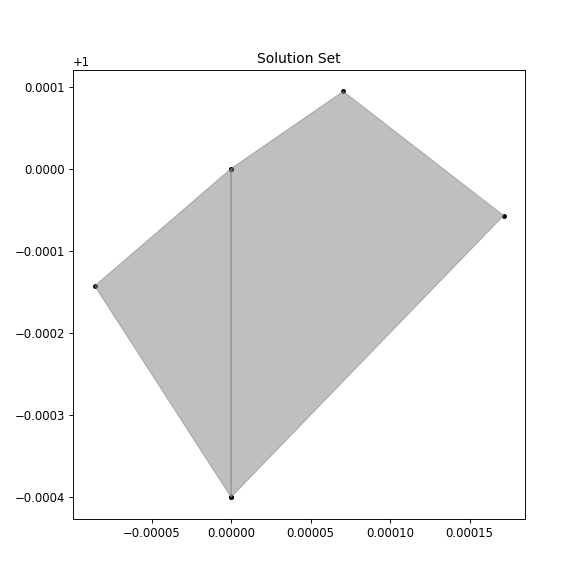

[array([[1.71428571e-04, 9.99942857e-01],
        [0.00000000e+00, 9.99600000e-01],
        [0.00000000e+00, 1.00000000e+00],
        [7.05882350e-05, 1.00009412e+00]]),
 array([[ 0.00000000e+00,  9.99600000e-01],
        [-8.57142860e-05,  9.99857143e-01],
        [ 0.00000000e+00,  1.00000000e+00]]),
 array([], dtype=float64),
 array([], dtype=float64)]

In [34]:
import intvalpy as ip
import numpy as np

A = ip.Interval([
    [[-2, 3], [1, 2]],
    [[4, 5], [-3, -1]],
    [[0, 6], [-2, 1]]
])
b = ip.Interval([[1, 2], [1, 2], [1, 2]])

weight = np.array([1, 0.0001, 0.0001])
v = np.array([1, 10000, 10000])

print(ip.linear.Tol(A, b, maxQ=True, tol=1e-16, weight=weight))

b = b + 0.0004 * ip.Interval(-1, 1) * v
tol = ip.linear.Tol(A, b, maxQ=True, tol=1e-16)
print(tol)

ip.IntLinIncR2(A, b, consistency='tol', size=(7, 7))

In [42]:
A, b = ip.Shary(4)

A = ip.Interval([
    [[-2, 3], [1, 2], [2, 3]],
    [[4, 5], [-3, -1], [-3, -2]],
    [[0, 6], [-2, 1], [-2, 0]]
])
b = ip.Interval([[1, 2], [1, 2], [1, 2]])

weight = np.array([1, 0.0001, 0.0001])
v = np.array([1, 10000, 10000])
b = b + 0.00025 * ip.Interval(-1, 1) * v

A = ip.Interval([
    [[-2, 3], [1, 2], [2, 3]],
    [[4, 5], [-3, -1], [-3, -2]],
    [[0, 6], [-2, 1], [-2, 0]]
])
b = ip.Interval([[-1, 2], [-1, 2], [-1, 2]])

_, _, _, tt = ip.linear.outliers(A, b, functional='tol')
print(tt)

[mpf('0.99999999999953343613895552698381724')
 mpf('1.0000000000005755125475665528221159')
 mpf('0.99999999999962578954407166949876722')]


In [7]:
A

Interval([['[-2, 3]', '[1, 2]', '[2, 3]'],
          ['[4, 5]', '[-3, -1]', '[-3, -2]'],
          ['[0, 6]', '[-2, 1]', '[-2, 0]']])

In [8]:
b

Interval(['[0.99975, 2.00025]', '[-1.5, 4.5]', '[-1.5, 4.5]'])

In [5]:
import intvalpy as ip
import numpy as np

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

# !!! Трехмерная графика !!!
%matplotlib notebook

# A = ip.Interval([
#     [[-2, 3], [1, 2]],
#     [[4, 5], [-3, -1]],
#     [[0, 6], [-2, 1]]
# ])
A = ip.Interval([
    [[-2, 3], [1, 2], [2, 3]],
    [[4, 5], [-3, -1], [-3, -2]],
    [[0, 6], [-2, 1], [-2, 0]]
])
b = ip.Interval([[1, 2], [1, 2], [1, 2]])

weight = np.array([1, 0.0001, 0.0001])
v = np.array([1, 10000, 10000])
# b = b + 0.00025 * ip.Interval(-1, 1) * v

ip.linear.Tol(A, b, maxQ=True, tol=1e-16, weight=weight)

(True, array([mpf('0.083434008481705497120168413296016496'),
        mpf('1.2334411852201856613547563696990056e-16'),
        mpf('0.58331319830365625526801807718639492')], dtype=object), mpf('-0.00024162035609841472631444053738219309'))

In [6]:
b = b + 0.00025 * ip.Interval(-1, 1) * v
tol = ip.linear.Tol(A, b, maxQ=True, tol=1e-16)
print(tol)

(True, array([mpf('0.071464285714285711230026807664111813'),
       mpf('1.0478782130951452948885971870868116e-16'),
       mpf('0.58570714285714276713350326187285717')], dtype=object), mpf('0.028735714285714216599978388359950445'))


<IPython.core.display.Javascript object>


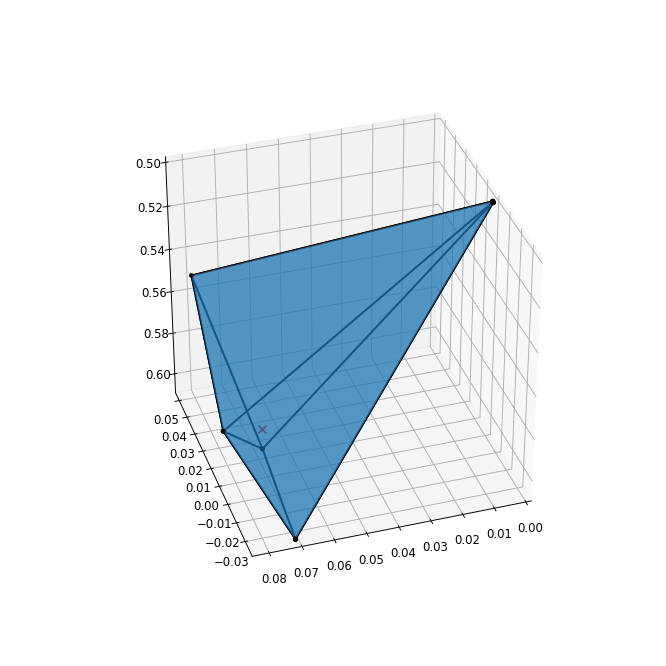

In [28]:
bounds = [[-3.947368421068631e-05, -0.03591964285714298, 0.49974999999999764], 
          [0.08343750000000008, 0.05293421052631647, 0.6072589285714283]]
color='C0'
alpha=0.5
s=10
size=(8, 8)

n, m = A.shape

vertices = ip.IntLinIncR3(A, b, consistency='tol', bounds=bounds, show=False)
# print(vertices)
fig = plt.figure(figsize=size)
ax = fig.add_subplot(111, projection='3d')
#     ax.grid(False)
if not bounds is None:
    ax.set_xlim((bounds[0][0], bounds[1][0]))
    ax.set_ylim((bounds[0][1], bounds[1][1]))
    ax.set_zlim((bounds[0][2], bounds[1][2]))

color1 = color
for el in vertices:

    color = color1
    l = 0
    for v in el:
        x, y, z = v[:, 0], v[:, 1], v[:, 2]
        xmin, ymin, zmin = np.min(abs(x)), np.min(abs(y)), np.min(abs(z))

        if n <= l and l < n + 3 and (xmin * ymin * zmin == 0):
            l += 1
            continue

        elif l >= n:
            color = 'red'

        poly3d = [list(zip(x, y, z))]
        PC = Poly3DCollection(poly3d, linewidths=1)
        PC.set_alpha(alpha)
        PC.set_facecolor(color)
        ax.add_collection3d(PC)

        ax.plot(x, y, z, color='black', alpha=1)
        ax.scatter(x, y, z, s=s, color='black')
        l += 1
        
ax.scatter(tol[1][0], tol[1][1], tol[1][2], s=50, color='red', marker='x')

In [60]:
import intvalpy as ip
from scipy.optimize import minimize

ip.precision.increasedPrecisionQ = False

# A, b = ip.Shary(3)
A = ip.Interval([
    [[-2, 3], [1, 2], [2, 3]],
    [[4, 5], [-3, -1], [-3, -2]],
    [[0, 6], [-2, 1], [-2, 0]]
])
b = ip.Interval([[1, 2], [1, 2], [1, 2]])

weight = np.array([1, 0.0001, 0.0001])
v = np.array([1, 10000, 10000])
b = b + 0.00025 * ip.Interval(-1, 1) * v

n, m = A.shape
tol = ip.linear.Tol(A, b, maxQ=True, tol=1e-16)

r = []
# print('start')
for angle_A in A.vertex:
    r.append((b.rad - abs(b.mid - angle_A @ tol[1])) / sum(abs(angle_A.T)))
r = np.array(r)

print(r.min(), tol)
result = tol[1] + r.min() * ip.Interval([-1]*m, [1]*m)
print(result)

0.002612337662337624 (True, array([7.14642857e-02, 2.28345115e-17, 5.85707143e-01]), 0.02873571428571431)
Interval(['[0.0688519, 0.0740766]', '[-0.00261234, 0.00261234]', '[0.583095, 0.588319]'])


In [55]:
model = lambda a, x: np.sum(a * x)

index = 0
f = lambda x: ((A[index,0]*(x) + A[index,1]*tol[1][1] + A[index,2]*tol[1][2]).b - b[index].b)**2
x0=[3]
minimize(f, x0, method='Nelder-Mead', tol=1e-12, options={'maxiter': 2000})

 final_simplex: (array([[-0.12156429],
       [-0.12156429]]), array([1.84413789e-25, 4.37837524e-25]))
           fun: 1.8441378875055268e-25
       message: 'Optimization terminated successfully.'
          nfev: 92
           nit: 46
        status: 0
       success: True
             x: array([-0.12156429])

In [1]:
import numpy as np
import intvalpy as ip

ip.precision.increasedPrecisionQ = False

# A = ip.Interval([
#     [[2, 3], [0, 1]],
#     [[1, 2], [2, 3]]
# ])
# b = ip.Interval([[0, 120], [60, 240]])

# A, b = ip.Shary(5)


A = ip.Interval([
    [[-2, 3], [1, 2], [2, 3]],
    [[4, 5], [-3, -1], [-3, -2]],
    [[0, 6], [-2, 1], [-2, 0]]
])
b = ip.Interval([[1, 2], [1, 2], [2, 2]])

# A = ip.Interval([
#     [[2, 3], [0, 1]],
#     [[1, 2], [2, 3]]
# ])
# b = ip.Interval([[0, 120], [60, 240]])
# b[1] = 1

x = ip.Interval([[-200, 200] for _ in range(A.shape[1])])
for _ in range(1):
    _, xx, ff = ip.linear.Uni(A, b, x=x, maxiter=2000, tol=1e-12)
#     print(xx, ff)
print(xx, ff)

Interval([[200, 200], [199.938, 199.938], [100.781, 100.781]]) 0.0


In [88]:
import intvalpy as ip

ip.precision.increasedPrecisionQ = False

from bisect import bisect_left
import numpy as np

from intvalpy.RealInterval import Interval, ARITHMETIC_TUPLE
from intvalpy.intoper import asinterval, infinity


class KeyWrapper:
    def __init__(self, iterable, key):
        self.it = iterable
        self.key = key

    def __getitem__(self, i):
        return self.key(self.it[i])

    def __len__(self):
        return len(self.it)


def globopt(func, x0, tol=1e-12, maxiter=2000):
    Y = x0.copy
    y = func(Y).a
    L = [(Y, y)]

    nit = 0
    while (Y.wid).all() >= tol and nit <= maxiter:
        l = np.argmax(Y.wid)
        Y1 = L[0][0].copy
        Y2 = L[0][0].copy
        Y1[l], Y2[l] = Interval(Y[l].a, Y[l].mid, sortQ=False), Interval(Y[l].mid, Y[l].b, sortQ=False)

        v1, v2 = func(Y1).a, func(Y2).a
        del L[0]

        newcol = (Y1, v1)
        bslindex = bisect_left(KeyWrapper(L, key=lambda c: c[1]), newcol[1])
        L.insert(bslindex, newcol)

        newcol = (Y2, v2)
        bslindex = bisect_left(KeyWrapper(L, key=lambda c: c[1]), newcol[1])
        L.insert(bslindex, newcol)
        Y = L[0][0]
        nit += 1

    return L[0][0], func(L[0][0])


def f1(x):
    q1 = ip.intersection( x[0]**2 + x[1]**2, ip.Interval(0, 1))
    q1 = 0 if np.isnan(q1.a) else 1
        
    q2 = ip.intersection( (x[0] - 4)**2 + x[1]**2, ip.Interval(0, 1))
    q2 = 0 if np.isnan(q2.a) else 1
        
    q = q1 * q2
    return -ip.Interval(q, q)


def f2(x):
    q1 = ip.intersection( x[0]**2 + x[1]**2, ip.Interval(0, 1))
    q1 = 0 if np.isnan(q1.a) else 1
        
    q2 = ip.intersection( (x[0] - 3/2)**2 + (x[1] - 3/2)**2, ip.Interval(0, 1))
    q2 = 0 if np.isnan(q2.a) else 1
        
    q = q1 * q2
    return -ip.Interval(q, q)


def f3(x):
    q1 = ip.intersection((x[0]**2/3 + x[1]**2/1.5), ip.Interval(0, 1))
    q1 = 0 if np.isnan(q1.a) else 1
        
    q2 = ip.intersection(((x[0]-3.22)**2 + (x[1] + 2.631)), ip.Interval(0, 1))
    q2 = 0 if np.isnan(q2.a) else 1
        
    q = q1 * q2
    return -ip.Interval(q, q)


def f4(x):
    q1 = ip.intersection((x[0]**2/3 + (x[1] + 7)**2/1.5), ip.Interval(0, 1))
    q1 = 0 if np.isnan(q1.a) else 1
        
    q2 = ip.intersection(((x[0]-3.22)**2 + (x[1] + 2.631)), ip.Interval(0, 1))
    q2 = 0 if np.isnan(q2.a) else 1
        
    q = q1 * q2
    return -ip.Interval(q, q)


x = ip.Interval([[-10, 10], [-10, 10]])
xx, ff = globopt(f4, x)
print(xx, -ff)

Interval(['[1.27609, 1.27609]', '[-6.17188, -6.17187]']) Interval(['[1, 1]'])


In [99]:
import intvalpy as ip
ip.precision.increasedPrecisionQ = False

f = lambda x: x**2 + 2*x - ip.exp(x)

x = ip.Interval([-0.123], [0.2])
# print(f(x))

# print(ip.nonlinear.globopt(f, x))

x**2, 2*x, ip.exp(x), f(x)

(Interval(['[0, 0.04]']),
 Interval(['[-0.246, 0.4]']),
 Interval(['[0.884264, 1.2214]']),
 Interval(['[-1.4674, -0.444264]']))

In [93]:
f(x)

Interval(['[-11.3891, 7.86466]'])

In [260]:
from bisect import bisect_left
import numpy as np

from intvalpy.RealInterval import Interval, ARITHMETIC_TUPLE
from intvalpy.intoper import asinterval, infinity
from intvalpy.nonlinear import globopt

import intvalpy as ip
ip.precision.increasedPrecisionQ = False


class KeyWrapper:
    def __init__(self, iterable, key):
        self.it = iterable
        self.key = key

    def __getitem__(self, i):
        return self.key(self.it[i])

    def __len__(self):
        return len(self.it)




def Tol(model, a, b, x=None, maxQ=False, grad=None, weight=None, x0=None, tol=1e-12, maxiter=2000):
    
    from scipy.optimize import minimize, LinearConstraint
    
    
    def tol_globopt(func, x0, grad, tol=1e-12, maxiter=2000):
        def sgn(x):
            if x.b < 0:
                return ip.Interval(-1, -1, sortQ=False)
            elif x.a < 0 and x.b == 0:
                return ip.Interval(-1, 0, sortQ=False)
            elif x.a < 0 and 0 < x.b:
                return ip.Interval(-1, 1, sortQ=False)
            elif x.a == 0 and x.b == 0:
                return ip.Interval(0, 0, sortQ=False)
            elif x.a == 0 and 0 < x.b:
                return ip.Interval(0, 1, sortQ=False)
            else:
                return ip.Interval(1, 1, sortQ=False)

        Y = x0.copy
        y = func(Y).a
        L = [(Y, y)]
        n = len(grad)

        nit = 0
        while func(Y).wid >= tol and nit <= maxiter:
            if nit % 500 == 0:
                print('nit: ', nit)
                print('Y: ', Y)
                print('func(Y): ', func(Y))
                print('+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+\n\n')
#             for k in range(len(grad)):
#                 tmp = grad[k](a, y)
#                 if 0 in tmp:
                    
#             gg = np.array([g(a, Y) for g in grad])
            
            gg = np.array([np.max(abs(grad[k](a, Y))) * Y[k].wid for k in range(len(grad))])
            l = np.argmax(gg)
            
            Y1 = L[0][0].copy
            Y2 = L[0][0].copy
            Y1[l], Y2[l] = Interval(Y[l].a, Y[l].mid, sortQ=False), Interval(Y[l].mid, Y[l].b, sortQ=False)
#             if Y[l].a:
#                 if -2 < Y[l].b / Y[l].a < -1/2:
#                     Y1[l], Y2[l] = Interval(Y[l].a, 0, sortQ=False), Interval(0, Y[l].b, sortQ=False)
#                 else:
#                     Y1[l], Y2[l] = Interval(Y[l].a, Y[l].mid, sortQ=False), Interval(Y[l].mid, Y[l].b, sortQ=False)
#             else:
#                 Y1[l], Y2[l] = Interval(Y[l].a, Y[l].mid, sortQ=False), Interval(Y[l].mid, Y[l].b, sortQ=False)
                

            del L[0]
            
#             zeroQ1 = False
            sgn1, sgn2 = bm - model(a, Y1), bm - model(a, Y2)
            v1, v2 = -min(br - mag(sgn1)), -min(br - mag(sgn2))
#             sgn1, sgn2 = min([sgn(s) for s in sgn1]), min([sgn(s) for s in sgn2])
            zeroQ1 = True if (sgn1.a <= 0).all() and (0 <= sgn1.b).all() else False
            zeroQ2 = True if (sgn2.a <= 0).all() and (0 <= sgn2.b).all() else False
            
#             ss1 = (sgn1.a > 0) | (0 > sgn1.b)
#             ss2 = (sgn2.a > 0) | (0 > sgn2.b)
            
            sgn1 = ip.asinterval([sgn(s) for s in sgn1])
            sgn2 = ip.asinterval([sgn(s) for s in sgn2])
                
#             if ((sgn2.a < 0) & (sgn2.b == 0)).any() or ((sgn2.a < 0) & (0 < sgn2.b)).any() or \
#                ((sgn2.a == 0) & (sgn2.b == 0)).any() or ((sgn2.a == 0) & (0 < sgn2.b)).any():
#                 zeroQ2 = True
#             else:
#                 zeroQ2 = False
                
            
            if zeroQ1:
                newcol = (Y1, v1.a)
                bslindex = bisect_left(KeyWrapper(L, key=lambda c: c[1]), newcol[1])
                L.insert(bslindex, newcol)
            else:
                zeroQ = True
                gg = ip.zeros(n)
                for k in range(n):
                    index = np.argmin((-(br - mag(bm - model(a, Y1)))).a)
                    gg[k] = -(sgn1[index] * grad[k](a[index], Y1))
                    if 0 in gg[k]:
                        zeroQ = True
                        break
                    else:
                        zeroQ = False
                        
                if zeroQ:
                    newcol = (Y1, v1.a)
                    bslindex = bisect_left(KeyWrapper(L, key=lambda c: c[1]), newcol[1])
                    L.insert(bslindex, newcol)
                else:
#                     print('ha')
#                     Y1 = ip.asinterval([Y1[k].b if gg[k] > ip.Interval(0, 0) else Y1[k].a for k in range(n)])
#                     v1 = func(Y1).a

                    linear_constraint = LinearConstraint(np.eye(n), Y1.a, Y1.b)
                    
                    res = minimize(_dot_gmax, Y1.mid, method='COBYLA', constraints=[linear_constraint],
                             tol=tol, options={'maxiter': maxiter})
                    v1 = res.fun
                    Y1 = ip.Interval(res.x, res.x, sortQ=False)
        
                    newcol = (Y1, v1)
                    bslindex = bisect_left(KeyWrapper(L, key=lambda c: c[1]), newcol[1])
                    L.insert(bslindex, newcol)
                    
                    
            if zeroQ2:
                newcol = (Y2, v2.a)
                bslindex = bisect_left(KeyWrapper(L, key=lambda c: c[1]), newcol[1])
                L.insert(bslindex, newcol)
            else:
                zeroQ = True
                gg = ip.zeros(n)
                for k in range(n):
                    index = np.argmin((-(br - mag(bm - model(a, Y2)))).a)
                    gg[k] = -(sgn2[index] * grad[k](a[index], Y2))
                    if 0 in gg[k]:
                        zeroQ = True
                        break
                    else:
#                         print('False')
                        zeroQ = False
                        
                if zeroQ:
                    newcol = (Y2, v2.a)
                    bslindex = bisect_left(KeyWrapper(L, key=lambda c: c[1]), newcol[1])
                    L.insert(bslindex, newcol)
                else:
#                     print('ha')
#                     Y1 = ip.asinterval([Y1[k].b if gg[k] > ip.Interval(0, 0) else Y1[k].a for k in range(n)])
#                     v1 = func(Y1).a

                    linear_constraint = LinearConstraint(np.eye(n), Y2.a, Y2.b)
                    
                    res = minimize(_dot_gmax, Y2.mid, method='COBYLA', constraints=[linear_constraint],
                             tol=tol, options={'maxiter': maxiter})
                    v2 = res.fun
                    Y2 = ip.Interval(res.x, res.x, sortQ=False)
        
                    newcol = (Y2, v2)
                    bslindex = bisect_left(KeyWrapper(L, key=lambda c: c[1]), newcol[1])
                    L.insert(bslindex, newcol)

            
            Y = L[0][0]
            nit += 1

        print('nit: ', nit)
        return L[0][0], func(L[0][0])
    
    
    def mag(x):
        result = ip.zeros(x.shape)
        index = x._a * x._b < 0
        result[index] = ip.Interval(np.zeros(x[index].shape), np.maximum(np.abs(x[index]._a), np.abs(x[index]._b)), sortQ=False)
        result[~index] = ip.Interval(np.minimum(np.abs(x[~index]._a), np.abs(x[~index]._b)), 
                                     np.maximum(np.abs(x[~index]._a), np.abs(x[~index]._b)), sortQ=False)
        return result
    
    br = b.rad
    bm = b.mid    
    
    _gmax = lambda x: -min(br - mag(bm - model(a, x)))
    _dot_gmax = lambda x: -min(br - abs(bm - model(a, x)))
    xx, ff = tol_globopt(_gmax, x, grad, maxiter=maxiter)
    
    return True, xx, -ff


# model = lambda a, x: (a + x[0] + x[1]) / (a + x[1] + x[2])

# dx1 = lambda a, x: 1 / (a + x[1] + x[2])
# dx2 = lambda a, x: -(a + x[0] + x[1]) / (a + x[1] + x[2])**2 + 1 / (a + x[1] + x[2])
# dx3 = lambda a, x: -(a + x[0] + x[1]) / (a + x[1] + x[2])**2
# grad = np.array([dx1, dx2, dx3])

model = lambda a, x: np.sin(a*x[0]) + np.cos(a*x[1])

N = 2
dx1 = lambda a, x: a*np.cos(a*x[0])
dx2 = lambda a, x: -a*np.sin(a*x[1])
grad = np.array([dx1, dx2])

# model = lambda a, x: x[0] + x[1] * np.sin(a*x[2]) + x[3] * np.cos(a*x[4]) + \
#                      x[5] * np.sin(a*x[6])**2 + x[7] * np.cos(a*x[8])**2 + x[9]*a

# N = 10
# dx1 = lambda a, x: 1
# dx2 = lambda a, x: np.sin(a*x[2])
# dx3 = lambda a, x: a*x[1] * np.cos(a*x[2])
# dx4 = lambda a, x: np.cos(a*x[4])
# dx5 = lambda a, x: -a*x[3] * np.sin(a*x[4])
# dx6 = lambda a, x: np.sin(a*x[6])**2
# dx7 = lambda a, x: 2 * a * x[5] * np.sin(a*x[6]) * np.cos(a*x[6])
# dx8 = lambda a, x: np.cos(a*x[8])**2
# dx9 = lambda a, x: -2 * a * x[7] * np.cos(a*x[8]) * np.sin(a*x[8])
# dx10 = lambda a, x: a

# grad = np.array([dx1, dx2, dx3, dx4, dx5, dx6, dx7, dx8, dx9, dx10])

# x = np.random.uniform(3, 1, N)

# # входные параметры функции возьмём, как точные значения
# length = 1000
# a = np.sort(np.random.uniform(3, 1, length).astype('float64'))

# # выходные значения с зашумлением
# error = np.random.normal(0, 0.001, length)
# b = model(a, x) + error
# # b[14] = 304992
# # b[15] = 304992

# # полагаем, что наибольшая ошибка нам известна
# # и конструируем интервальный вектор выходных данных
# epsilon = np.max(abs(error))
# b = b + ip.Interval(-epsilon, epsilon)
# a = ip.asinterval(a)

_x0 = np.array([np.random.uniform(-5, 5, len(grad)) for k in range(1000)])
ff = -3023423
k = 0
for x0 in _x0:
#     print(k)
    _, xxx, fff = ip.nonlinear.Tol(model, a, b, maxQ=True, grad=grad, x0=x0)
    if fff > ff:
        xx = xxx
        ff = fff
    k = k + 1
print(xx, ff)

# [1.29222088 1.5662655 ] 0.0001953656519731485
#!!!                      0.000195366

[ 2.85758267 -1.21459656] 3.6461904833862135e-05


In [259]:
xxx = ip.zeros(x.shape) + ip.Interval(-5, 5)
_, xx, ff = Tol(model, a, b, x=xxx, maxiter=1000, grad=grad)
print(xx, ff)

nit:  0
Y:  Interval(['[-5, 5]', '[-5, 5]'])
func(Y):  Interval(['[-0.00300545, 2.60383]'])
+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+


nit:  279
Interval(['[2.85758, 2.85758]', '[1.2146, 1.2146]']) Interval(['[3.63975e-05, 3.63975e-05]'])


In [ ]:
Interval(['[4.77324, 4.77324]', '[-1.25, -1.25]'])
Interval(['[2.18625, 2.18625]', '[-0.726317, -0.726317]'])
Interval(['[2.04809, 2.04809]', '[-3.22569, -3.22569]'])
Interval(['[-0.176342, -0.176342]', '[3.75, 3.75]'])
Interval(['[-4.375, -4.375]', '[3.75, 3.75]'])
Interval(['[-2.5, -2.5]', '[1.25, 1.25]'])
Interval(['[-2.51658, -2.51658]', '[1.39452, 1.39452]'])
Interval(['[-4.37525, -4.37525]', '[1.00483, 1.00483]'])
Interval(['[0, 0]', '[-1.25, -1.25]'])
Interval(['[-0.3125, -0.3125]', '[-0.625, -0.625]'])
Interval(['[-3.94002, -3.94002]', '[-1.25, -1.25]'])
Interval(['[-4.375, -4.375]', '[-3.75209, -3.75209]'])

In [62]:
# xxx = ip.Interval([[3.14129, 3.14129], [-0.00246653, -0.00246653], [-3.64153e-14, 5.32019e-13]])
ip.nonlinear.Tol(model, a, b, x=np.array([1.2915,  1.56494]))

-0.001961336179299944

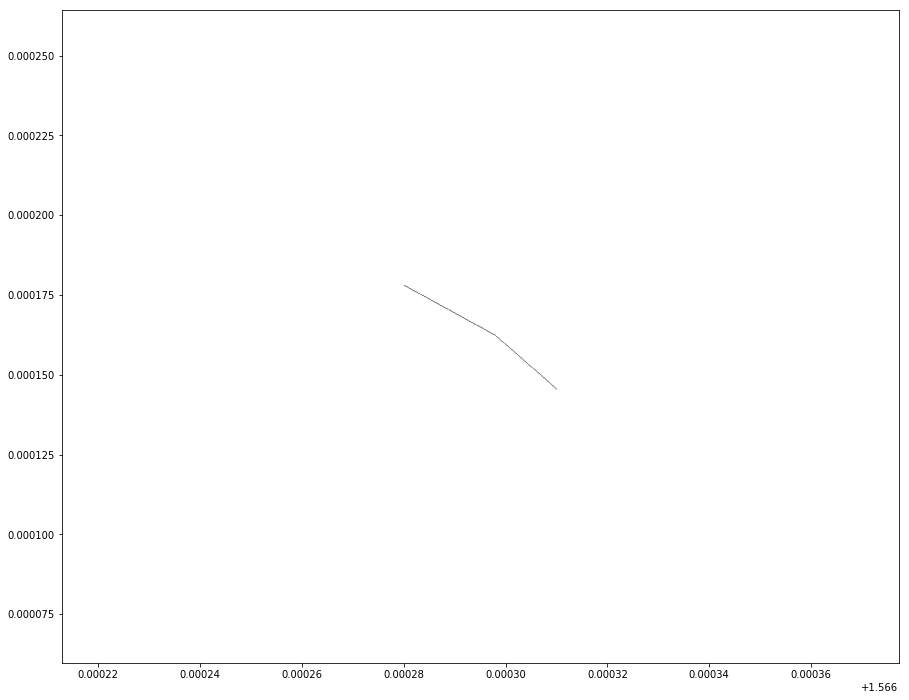

In [244]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(15, 12))
ax = fig.add_subplot(111)

ox = np.arange(1.56628, 1.56631, 0.0000001)
oy = np.array([ip.nonlinear.Tol(model, a, b, x=np.array([1.292226, ox[k]])) for k in range(len(ox))])

ax.scatter(ox, oy, s=0.01, color='black', alpha=1)

In [4]:
xxx = x + ip.Interval(-5, 5)
_, xx, ff = Tol(model, a, b, x=xxx, maxiter=500000, grad=grad)
print(xx, ff)

TypeError: ufunc 'bitwise_and' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [4]:
xxx = x + ip.Interval(-5, 5)
_, xx, ff = Tol(model, a, b, x=xxx, maxiter=500000, grad=grad)
print(xx, ff)

nit:  3602
Interval(['[3.14004, 3.14004]', '[-0.000404522, -0.000404522]', '[0.034154, 0.034154]']) Interval(['[0.000132798, 0.000132798]'])


In [27]:
import intvalpy as ip
import matplotlib.pyplot as plt
import numpy as np

from mpl_toolkits.mplot3d.art3d import Poly3DCollection

# %matplotlib notebook

In [44]:
inf = np.array([[-1,-2,-2], [-2,-1,-2], [-2,-2,-1]])
sup = np.array([[1,2,2], [2,1,2], [2,2,1]])
A = ip.Interval(inf, sup)
b = ip.Interval([2,2,2], [2,2,2])

n1, m1 = A.shape

bounds1 = [[-2, -2, -2], [2, 2, 2]]
vertices1 = ip.IntLinIncR3(A, b, alpha=0.5, s=0, bounds=bounds1, size=(11,11), show=False)

In [47]:
A = ip.Interval([[-1, 0, 0], [0, -1, 0], [0, 0, -1], [1, 0, 0], [0, 1, 0], [0, 0, 1]], \
                [[1, 0, 0], [0, 1, 0], [0, 0, 1], [1, 0, 0], [0, 1, 0], [0, 0, 1]])
b = ip.Interval([1, 1, 1, -1, -1, -1], [1, 1, 1, 2, 2, 2])

n2, m2 = A.shape

bounds2 = [[-1.1, -1.1, -1.1], [2.1, 2.1, 2.1]]
vertices2 = ip.IntLinIncR3(A, b, alpha=0.5, bounds=bounds2, show=False)

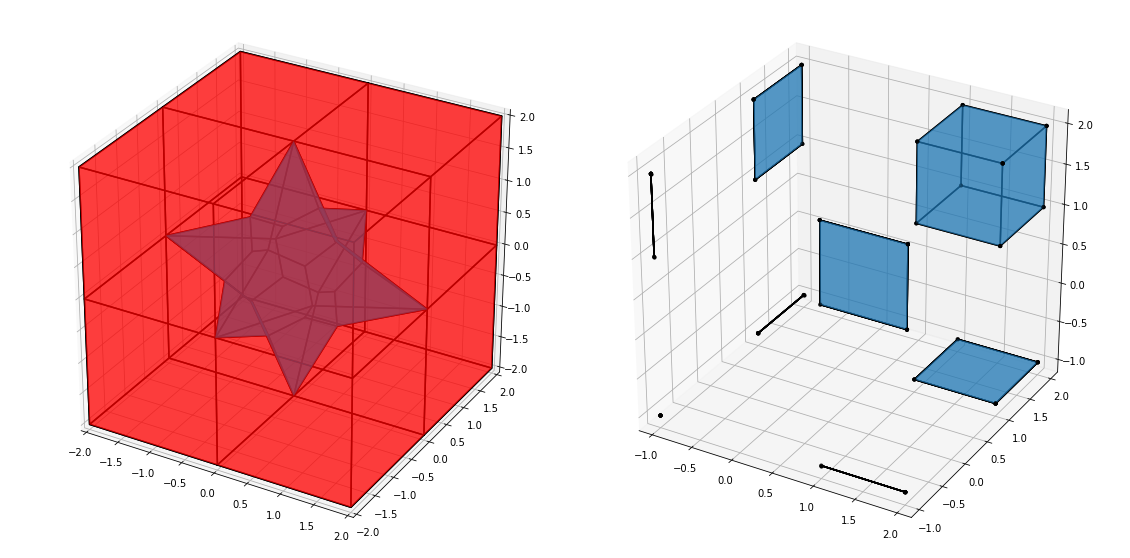

In [49]:
fig = plt.figure(figsize=(20, 10))

plt.subplots_adjust(wspace=0, hspace=0)

ax1 = fig.add_subplot(1, 2, 1, projection='3d')

bounds = bounds1
ax1.set_xlim((bounds[0][0], bounds[1][0]))
ax1.set_ylim((bounds[0][1], bounds[1][1]))
ax1.set_zlim((bounds[0][2], bounds[1][2]))

color='C0'
s = 0
n = n1
zero_lvl=True
alpha = 0.5

color1 = color
for el in vertices1:

    color = color1
    l = 0
    for v in el:
        x, y, z = v[:, 0], v[:, 1], v[:, 2]
        xmin, ymin, zmin = np.min(abs(x)), np.min(abs(y)), np.min(abs(z))
        xmax, ymax, zmax = np.max(abs(x)), np.max(abs(y)), np.max(abs(z))

        if n <= l and l < n + 3 and (xmin * ymin * zmin == 0):
            l += 1
            continue

        elif zero_lvl and ((xmax==xmin and xmax==0 and abs(gxmin*gxmax) > 1e-14) or
                           (ymax==ymin and ymax==0 and abs(gymin*gymax) > 1e-14) or
                           (zmax==zmin and zmax==0 and abs(gzmin*gzmax) > 1e-14)):      # demo
            continue

        elif l >= n:
            color = 'red'

        poly3d = [list(zip(x, y, z))]
        PC = Poly3DCollection(poly3d, linewidths=1)
        PC.set_alpha(alpha)
        PC.set_facecolor(color)
        ax1.add_collection3d(PC)

        ax1.plot(x, y, z, color='black', alpha=1)
        ax1.scatter(x, y, z, s=s, color='black')
        l += 1


ax2 = fig.add_subplot(1, 2, 2, projection='3d')

bounds = bounds2
ax2.set_xlim((bounds[0][0], bounds[1][0]))
ax2.set_ylim((bounds[0][1], bounds[1][1]))
ax2.set_zlim((bounds[0][2], bounds[1][2]))

color='C0'
s = 10
n = n2
zero_lvl=True
alpha = 0.5

color1 = color
for el in vertices2:

    color = color1
    l = 0
    for v in el:
        x, y, z = v[:, 0], v[:, 1], v[:, 2]
        xmin, ymin, zmin = np.min(abs(x)), np.min(abs(y)), np.min(abs(z))
        xmax, ymax, zmax = np.max(abs(x)), np.max(abs(y)), np.max(abs(z))

        if n <= l and l < n + 3 and (xmin * ymin * zmin == 0):
            l += 1
            continue

        elif zero_lvl and ((xmax==xmin and xmax==0 and abs(gxmin*gxmax) > 1e-14) or
                           (ymax==ymin and ymax==0 and abs(gymin*gymax) > 1e-14) or
                           (zmax==zmin and zmax==0 and abs(gzmin*gzmax) > 1e-14)):      # demo
            continue

        elif l >= n:
            color = 'red'

        poly3d = [list(zip(x, y, z))]
        PC = Poly3DCollection(poly3d, linewidths=1)
        PC.set_alpha(alpha)
        PC.set_facecolor(color)
        ax2.add_collection3d(PC)

        ax2.plot(x, y, z, color='black', alpha=1)
        ax2.scatter(x, y, z, s=s, color='black')
        l += 1

# fig, ax = plt.subplots(ncols=2, figsize=(15,8))
fig.savefig("IntLinIncR3.png", bbox_inches='tight', pad_inches=0)

In [25]:
data = [1/3, ip.Interval(-2, 5), 2]
data = ip.asinterval(data)
data

In [30]:
'Interval' + data.__repr__()[5:-15] + ')'

"Interval(['[0.333333, 0.333333]', '[-2, 5]', '[2, 2]'])"

In [ ]:
1 

In [12]:
import numpy as np
import intvalpy as ip

from time import perf_counter as pc

ip.precision.increasedPrecisionQ = True

# ip.Interval(2, 3)
A, b = ip.Neumeier(4, 5, supb=2)
t0 = pc()
pss = ip.linear.Gauss_Seidel(A, b)
print(pss)
pc() - t0


Interval(['[-8.36207, 8.5]', '[-8.36207, 8.5]', '[-8.36207, 8.5]',
       '[-8.36207, 8.5]'])


0.29172540000001845

In [14]:
pss.a

(4,)

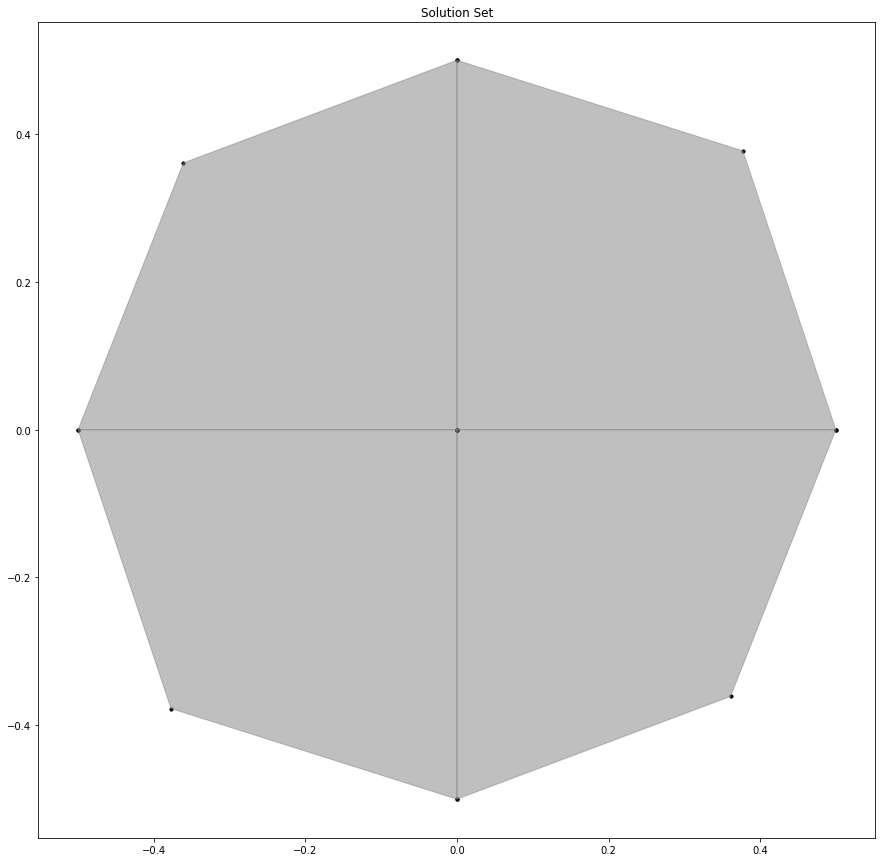

In [4]:
vertices = ip.IntLinIncR2(A, b, consistency='tol')

In [3]:
A.a

self:  array([['[1, 2]', '[-0.77, 0.65]'],
       ['[-0.77, 0.65]', '[1, 2]']], dtype=object)
self._data:  [['[1, 2]' '[-0.77, 0.65]']
 ['[-0.77, 0.65]' '[1, 2]']]
'[1, 2]'
'[1, 2]'
'[-0.77, 0.65]'
'[-0.77, 0.65]'
'[1, 2]'


array([[None, None],
       [None, None]], dtype=object)

In [23]:
import intvalpy as ip
import numpy as np

from time import perf_counter as pc

ip.precision.increasedPrecisionQ = False

model = lambda a, x: (a + x[0]) / (a + x[1])

dx1 = lambda a, x: 1 / (a + x[1])
dx2 = lambda a, x: -(a + x[0]) / (a + x[1])**2
grad = np.array([dx1, dx2])

t = np.array([31, 69, 144, 198, 359, 446, 536, 626, 716, 809, 903, 1039, 1161, \
              1316, 1536, 2029, 2400, 29, 64, 135, 189, 261, 342, 432, 517, 613, \
              699, 792, 888, 1020, 1142, 1301, 1511, 2017, 2400, 65, 96, 521, 617, \
              705, 794, 892, 1024, 1148, 1309, 1520, 2003, 2400, 27, 83, 121, 173, \
              234, 307, 394, 467, 553, 636, 715, 806, 915, 1026, 1170, 1364, 1500, \
              2400, 77, 112, 155, 216, 367, 458, 541, 639, 741, 825, 936, 1061, \
              1189, 1200, 1426, 1902, 2400, 67, 102, 145, 206, 357, 448, 531, 629, \
              731, 815, 900, 1030, 1115, 1326, 1554, 2015, 2400]);
data = np.array([0.8, 0.84, 0.85, 0.89, 0.93, 0.93, 0.93, 0.93, 0.93, 0.93, 0.93, \
                 0.95, 0.95, 0.96, 0.97, 0.99, 1, 0.79, 0.82, 0.85, 0.89, 0.91, 0.92, \
                 0.93, 0.93, 0.94, 0.93, 0.93, 0.94, 0.95, 0.95, 0.96, 0.97, 0.99, 1, \
                 0.84, 0.84, 0.94, 0.94, 0.94, 0.95, 0.95, 0.96, 0.96, 0.97, 0.96, \
                 0.97, 1, 0.78, 0.81, 0.84, 0.89, 0.9, 0.92, 0.93, 0.92, 0.93, 0.93, \
                 0.92, 0.93, 0.95, 0.95, 0.96, 0.97, 0.98, 1, 0.8, 0.82, 0.86, 0.9, \
                 0.91, 0.93, 0.93, 0.94, 0.94, 0.93, 0.94, 0.95, 0.95, 0.96, 0.96, \
                 0.98, 1, 0.81, 0.83, 0.86, 0.9, 0.91, 0.93, 0.93, 0.94, 0.94, 0.93, \
                 0.93, 0.94, 0.94, 0.97, 0.96, 0.98, 1])

t = t + ip.Interval(0, 0)
data = data + ip.Interval(-0.0255, 0.0255)

A = ip.zeros((100, 2))
A[:, 0] += ip.Interval(1, 1)
A[:, 1] -= data
b = t * (data - 1)

# A, b = ip.Neumeier(50, 3.5)

print(ip.linear.Uni(A, b, maxQ=True))
# x0 = np.array([171.673, 224.912])
print(ip.linear.Tol(A, b, maxQ=True))
uni = ip.nonlinear.Uni(model, t, data, maxQ=True, grad=grad)
vertices = ip.IntLinIncR2(A, b, show = False)

(True, array([161.7148334 , 212.75833342]), 0.4806708338076868)
(True, array([161.71483333, 212.75833333]), -10.370004166666678)


In [18]:
uni = ip.nonlinear.Tol(model, t, data, maxQ=True, grad=grad)

In [22]:
ip.linear.Uni(A, b, x=np.array([173.9506, 227.68  ]))

0.56273999999999

In [ ]:
import numpy as np
from time import perf_counter as pc

import intvalpy as ip
ip.precision.increasedPrecisionQ = False


def branin(x):
    return (x[1] - 5.1/(4*np.pi**2)*x[0]**2 + 5/np.pi*x[0] - 6)**2 + 10*(1 - 1/(8*np.pi))*np.cos(x[0]) + 10
# +-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+

def trekkani(x):
    return x[0]**4 + 4*x[0]**3 + 4*x[0]**2 + x[1]**2
# +-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+

def rosenbrock(x):
    return sum(100*(x[1:] - x[:-1]**2)**2 + (1 - x[:-1])**2)
# +-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+

def dixonprice(x):
    return (x[0]-1)**2 + sum((k+1)*(2*x[k]**2-x[k-1])**2 for k in range(1, len(x)))
# +-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+

def levy(x):
    z = 1 + (x - 1) / 4
    t1 = np.sin( np.pi * z[0] )**2
    t2 = sum(((x - 1) ** 2 * (1 + 10 * np.sin(np.pi * x + 1) ** 2))[:-1])
    t3 = (z[-1] - 1) ** 2 * (1 + np.sin(2*np.pi * z[-1]) ** 2)
    return t1 + t2 + t3
# +-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+

def rastrigin(x):
    return 10*len(x) + sum(x**2 - 10 * np.cos(2 * np.pi * x))
# +-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+

def bohachevsky(x):
    return x[0]**2 + 2*x[1]**2 - 0.3*np.cos(3*np.pi*x[0]) -0.4*np.cos(4*np.pi*x[1]) + 0.7
# +-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+

def beale(x):
    return (1.5 - x[0] + x[0]*x[1])**2 + (2.25 - x[0] + x[0]*x[1]**2)**2 + (2.625 - x[0] + x[0]*x[1]**3)**2
# +-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+

def booth(x):
    return (x[0] + 2*x[1] - 7)**2 + (2*x[0] + x[1] - 5)**2
# +-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+

def colville(x):
    return 100*(x[0]**2 - x[1])**2 + (x[0] - 1)**2 + (x[2] - 1)**2 + 90*(x[2]**2 - x[3])**2 + \
           10.1*((x[1] - 1)**2 + (x[3] - 1)**2) + 19.8*(x[1] - 1)*(x[3] - 1)
# +-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+

def dejoung(x):
    return x[0]**2 + x[1]**2 + x[2]**2
# +-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+

def easom(x):
    return -np.cos(x[0]) * np.cos(x[1]) * np.exp(-(x[0] - np.pi)**2 - (x[1] - np.pi)**2)
# +-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+

def hartmann(x):
    alpha = np.array([1, 1.2, 3, 3.2])
    A = np.array([[3.0, 10, 30],
                  [0.1, 10, 35],
                  [3.0, 10, 30],
                  [0.1, 10, 35]])
    P = 10**(-4) * np.array([[6890, 1170, 2673],
                             [4699, 4387, 7470],
                             [1091, 8732, 5547],
                             [381, 5743, 8828]])

    return -alpha @ np.exp(-sum((A * (x.T - P) ** 2).T))
# +-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+

def matyas(x):
    return 0.26*(x[0]**2 + x[1]**2) - 0.48*x[0]*x[1]
# +-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+

def eggholder(x):
    return -(x[1] + 47) * np.sin(np.sqrt(abs(x[0]/2 + (x[1] + 47)))) - \
            x[0]*np.sin(np.sqrt(abs(x[0] - (x[1]+47))))
# +-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+

def shaffner(x):
    return 0.5 + (np.cos(np.sin(abs(x[0]**2 - x[1]**2)))**2 - 0.5) / (1 + 0.001*(x[0]**2 + x[1]**2))**2
# +-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+

def holder(x):
    return -abs(np.sin(x[0])*np.cos(x[1]) * np.exp(abs(1 - np.sqrt(x[0]**2 + x[1]**2) / np.pi)))
# +-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+

def levy13(x):
    return np.sin(3*np.pi*x[0])**2 + (x[0] - 1)**2 * (1 + np.sin(3*np.pi*x[1])**2) + \
            (x[1] - 1)**2 * (1 + np.sin(2*np.pi*x[1]))
# +-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+


# +-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+
# +-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+


test_opt = [
    [branin,        ip.Interval([[-5, 10], [0, 15]])],
    [bohachevsky,   ip.Interval([[-50, 100] for _ in range(2)])],
    [beale,         ip.Interval([[-4.5, 4.5] for _ in range(2)])],
    [booth,         ip.Interval([[-10, 10] for _ in range(2)])],
    [dejoung,       ip.Interval([[-2.56, 5.12] for _ in range(3)])],
    [easom,         ip.Interval([[-100, 100] for _ in range(2)])],
    [eggholder,     ip.Interval([[-512, 512] for _ in range(2)])],
    [rastrigin,     ip.Interval([[-2.56, 5.12] for _ in range(4)])],
    [shaffner,      ip.Interval([[-100, 100] for _ in range(2)])],
    [levy13,        ip.Interval([[-10, 10] for _ in range(2)])],
    [hartmann,      ip.Interval([[0, 1] for _ in range(3)])],
    [trekkani,      ip.Interval([[-5, 5], [-5, 5]])],
    [rosenbrock,    ip.Interval([[-5, 10] for _ in range(2)])],
    [dixonprice,    ip.Interval([[-10, 10] for _ in range(2)])],
    [levy,          ip.Interval([[-10, 10] for _ in range(2)])],
    [matyas,        ip.Interval([[-5, 10] for _ in range(2)])],
    [colville,      ip.Interval([[-10, 10] for _ in range(4)])],
    [holder,        ip.Interval([[-10, 10] for _ in range(2)])]
]


n = 20
for func, x0 in test_opt:

    t0 = pc()
    for _ in range(n):
        globopt = ip.nonlinear.globopt(func, x0, tol=1e-14, maxiter=10000)
    print('function: ', func.__name__)
    print('x: ', globopt[0])
    print('func(x): ', globopt[1])
    print('tol: ', func(globopt[0]).wid)
    print('mean time: ', (pc() - t0) / n)
    print('+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+\n\n')


function:  branin
x:  Interval(['[9.42478, 9.42478]', '[2.475, 2.475]'])
func(x):  '[0.397887, 0.397887]'
tol:  8.881784197001252e-15
mean time:  0.038548545000000004
+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+


function:  bohachevsky
x:  Interval(['[-1.16415e-08, 5.82077e-09]', '[-1.16415e-08, 5.82077e-09]'],
    )
func(x):  '[0, 6.43929e-15]'
tol:  6.439293542825908e-15
mean time:  0.021343710000000016
+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+


function:  beale
x:  Interval(['[3, 3]', '[0.5, 0.5]'])
func(x):  '[0, 5.66393e-15]'
tol:  5.663926616555323e-15
mean time:  0.18462636500000001
+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+


function:  booth
x:  Interval(['[1, 1]', '[3, 3]'])
func(x):  '[0, 7.89646e-15]'
tol:  7.896461262646432e-15
mean time:  0.033425665000000035
+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+


In [6]:
import intvalpy as ip

A, b = ip.Shary(3)

ip.sgn(A)

Interval([['[1, 1]', '[-1, 1]', '[-1, 1]'],
       ['[-1, 1]', '[1, 1]', '[-1, 1]'],
       ['[-1, 1]', '[-1, 1]', '[1, 1]']])

In [7]:
A.mag

array([[mpf('3.0'), mpf('0.769999999999999999999999999999999999985'),
        mpf('0.769999999999999999999999999999999999985')],
       [mpf('0.769999999999999999999999999999999999985'), mpf('3.0'),
        mpf('0.769999999999999999999999999999999999985')],
       [mpf('0.769999999999999999999999999999999999985'),
        mpf('0.769999999999999999999999999999999999985'), mpf('3.0')]],
      dtype=object)

In [8]:
abs(A)

array([['[2, 3]', '[0, 0.77]', '[0, 0.77]'],
       ['[0, 0.77]', '[2, 3]', '[0, 0.77]'],
       ['[0, 0.77]', '[0, 0.77]', '[2, 3]']], dtype=object)

In [9]:
A

Interval([['[2, 3]', '[-0.77, 0.65]', '[-0.77, 0.65]'],
       ['[-0.77, 0.65]', '[2, 3]', '[-0.77, 0.65]'],
       ['[-0.77, 0.65]', '[-0.77, 0.65]', '[2, 3]']])

In [1]:
import intvalpy as ip
import numpy as np

from time import perf_counter as pc

ip.precision.increasedPrecisionQ = False

model = lambda a, x: (a + x[0]) / (a + x[1])

dx1 = lambda a, x: 1 / (a + x[1])
dx2 = lambda a, x: -(a + x[0]) / (a + x[1])**2
grad = np.array([dx1, dx2])

t = np.array([31, 69, 144, 198, 359, 446, 536, 626, 716, 809, 903, 1039, 1161, \
              1316, 1536, 2029, 2400, 29, 64, 135, 189, 261, 342, 432, 517, 613, \
              699, 792, 888, 1020, 1142, 1301, 1511, 2017, 2400, 65, 96, 521, 617, \
              705, 794, 892, 1024, 1148, 1309, 1520, 2003, 2400, 27, 83, 121, 173, \
              234, 307, 394, 467, 553, 636, 715, 806, 915, 1026, 1170, 1364, 1500, \
              2400, 77, 112, 155, 216, 367, 458, 541, 639, 741, 825, 936, 1061, \
              1189, 1200, 1426, 1902, 2400, 67, 102, 145, 206, 357, 448, 531, 629, \
              731, 815, 900, 1030, 1115, 1326, 1554, 2015, 2400]);
data = np.array([0.8, 0.84, 0.85, 0.89, 0.93, 0.93, 0.93, 0.93, 0.93, 0.93, 0.93, \
                 0.95, 0.95, 0.96, 0.97, 0.99, 1, 0.79, 0.82, 0.85, 0.89, 0.91, 0.92, \
                 0.93, 0.93, 0.94, 0.93, 0.93, 0.94, 0.95, 0.95, 0.96, 0.97, 0.99, 1, \
                 0.84, 0.84, 0.94, 0.94, 0.94, 0.95, 0.95, 0.96, 0.96, 0.97, 0.96, \
                 0.97, 1, 0.78, 0.81, 0.84, 0.89, 0.9, 0.92, 0.93, 0.92, 0.93, 0.93, \
                 0.92, 0.93, 0.95, 0.95, 0.96, 0.97, 0.98, 1, 0.8, 0.82, 0.86, 0.9, \
                 0.91, 0.93, 0.93, 0.94, 0.94, 0.93, 0.94, 0.95, 0.95, 0.96, 0.96, \
                 0.98, 1, 0.81, 0.83, 0.86, 0.9, 0.91, 0.93, 0.93, 0.94, 0.94, 0.93, \
                 0.93, 0.94, 0.94, 0.97, 0.96, 0.98, 1])

t = t + ip.Interval(0, 0)
data = data + ip.Interval(-0.0255, 0.0255)

A = ip.zeros((100, 2))
A[:, 0] += ip.Interval(1, 1)
A[:, 1] -= data
b = t * (data - 1)

# A, b = ip.Neumeier(50, 3.5)

print(ip.linear.Uni(A, b, maxQ=True))
# x0 = np.array([171.673, 224.912])
# print(ip.linear.Tol(A, b, x0=x0, maxQ=True), ip.linear.Tol(A, b, maxQ=True))
# uni = ip.nonlinear.Uni(model, t, data, maxQ=True, grad=grad)
# vertices = ip.IntLinIncR2(A, b, show = False)

(True, array([161.7148334 , 212.75833342]), 0.4806708338076868)


In [2]:
x = np.array([161.71483341, 212.75833342])
t0 = pc()
for _ in range(100):
    ip.linear.Uni(A, b, maxQ=True, x0=x)
pc() - t0

5.197631

In [ ]:

15.48504419999999

In [4]:
import intvalpy as ip
import numpy as np
from mpmath import *
from time import perf_counter as pc

ip.precision.increasedPrecisionQ = True
ip.precision.dps(50)

A = ip.zeros((8, 4))
A[0, :] = np.array([-400440, 801193, -91906, -794234])
A[1, :] = np.array([-801193, -400440, 794234, -91906])
A[2, :] = np.array([-455275, -821605, 629764, 478962])
A[3, :] = np.array([821605, -455275, -478962, 629764])
A[4, :] = np.array([906754, 211561, -719976, 233679])
A[5, :] = np.array([-211561, 906754, -233679, -719976])
A[6, :] = np.array([-701307, 597374, 276388, -727253])
A[7, :] = np.array([-597374, -701307, 727253, 276388])
A = A + ip.Interval(-200, 200)
b = np.array([-1623, -38942, -32327, 19414, 39459, 10602, -14473, -36124])
b = b + ip.Interval(-100, 100)

A, b = ip.Shary(5)

t0 = pc()
for _ in range(10):
#     ip.linear.Uni(A, b, maxQ=True)
    Rohn = ip.linear.Rohn(A, b)
    pss = ip.linear.PSS(A, b, maxiter=4000)
print(((pss.a >= Rohn.a) & (pss.b <= Rohn.b)).all())
print(pss)
pc() - t0

True
Interval(['[-4.34783, 4.34783]', '[-4.34783, 4.34783]',
       '[-4.34783, 4.34783]', '[-4.34783, 4.34783]',
       '[-4.34783, 4.34783]'])


5.201508899999681

In [13]:
A = ip.Interval([
    [[4, 6], [-9, 0], [0, 12], [2, 3], [5, 9], [-23, -9], [15, 23]],
    [[0, 1], [6, 10], [-1, 1], [-1, 3], [-5, 1], [1, 15], [-3, -1]],
    [[0, 3], [-20, -9], [12, 77], [-6, 30], [0, 3], [-18, 1], [0, 1]],
    [[-4, 1], [-1, 1], [-3, 1], [3, 5], [5, 9], [1, 2], [1, 4]],
    [[0, 3], [0, 6], [0, 20], [-1, 5], [8, 14], [-6, 1], [10, 17]],
    [[-7, -2], [1, 2], [7, 14], [-3, 1], [0, 2], [3, 5], [-2, 1]],
    [[-1, 5], [-3, 2], [0, 8], [1, 11], [-5, 10], [2, 7], [6, 82]]
], sortQ=False)
b = ip.Interval([[-10, 95], [35, 14], [-6, 2], [30, 7], [4, 95], [-6, 46], [-2, 65]], sortQ=False)
res = Subdiff(A, b)
print(res)
# Interval(['[-1.22474, 0.50543]', '[18.2644, -9.5175]',
#        '[-0.0281865, 1.16076]', '[16.4077, -14.4555]',
#        '[-1.34357, 3.98822]', '[-3.52894, 4.54346]',
#        '[5.43086, -0.674008]'])

Interval(['[-1.22474, 0.50543]', '[18.2644, -9.5175]',
       '[-0.0281865, 1.16076]', '[16.4077, -14.4555]',
       '[-1.34357, 3.98822]', '[-3.52894, 4.54346]',
       '[5.43086, -0.674008]'])
